In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv("../DATA/iris.csv")

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

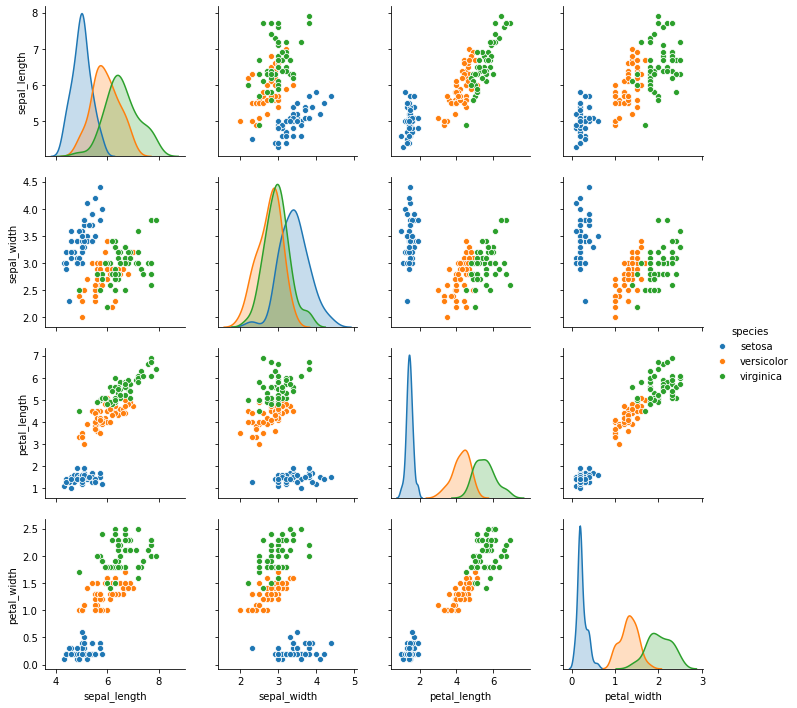

In [20]:
sns.pairplot(df,hue='species')

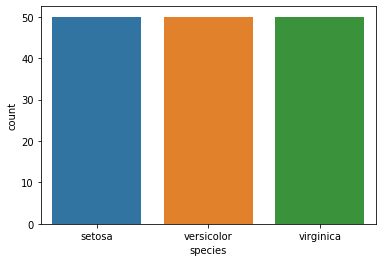

In [23]:
sns.countplot(x='species',data=df)

In [21]:
X = df.drop('species',axis=1)
y = df['species']

In [22]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
#y

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
df.shape

(150, 5)

In [82]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

# Last layer: multi-class classification of 3 species
model.add(Dense(units=3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [85]:
model.fit(X_train_scaled,y_train,epochs=300,
          validation_data=(X_test_scaled,y_test),
          callbacks=[early_stop])

Train on 120 samples, validate on 30 samples
Epoch 1/300
120/120 [==============================] - 0s 4ms/sample - loss: 1.0374 - accuracy: 0.6250 - val_loss: 1.0265 - val_accuracy: 0.6667
Epoch 2/300
120/120 [==============================] - 0s 129us/sample - loss: 1.0325 - accuracy: 0.6417 - val_loss: 1.0233 - val_accuracy: 0.7000
Epoch 3/300
120/120 [==============================] - 0s 131us/sample - loss: 1.0281 - accuracy: 0.6167 - val_loss: 1.0203 - val_accuracy: 0.7000
Epoch 4/300
120/120 [==============================] - 0s 128us/sample - loss: 1.0235 - accuracy: 0.6167 - val_loss: 1.0175 - val_accuracy: 0.6667
Epoch 5/300
120/120 [==============================] - 0s 137us/sample - loss: 1.0188 - accuracy: 0.6333 - val_loss: 1.0146 - val_accuracy: 0.6333
Epoch 6/300
120/120 [==============================] - 0s 145us/sample - loss: 1.0149 - accuracy: 0.6250 - val_loss: 1.0118 - val_accuracy: 0.5667
Epoch 7/300
120/120 [==============================] - 0s 132us/sample - lo

120/120 [==============================] - 0s 110us/sample - loss: 0.8603 - accuracy: 0.6917 - val_loss: 0.8922 - val_accuracy: 0.6000
Epoch 57/300
120/120 [==============================] - 0s 109us/sample - loss: 0.8573 - accuracy: 0.6917 - val_loss: 0.8894 - val_accuracy: 0.6000
Epoch 58/300
120/120 [==============================] - 0s 116us/sample - loss: 0.8542 - accuracy: 0.6917 - val_loss: 0.8865 - val_accuracy: 0.6000
Epoch 59/300
120/120 [==============================] - 0s 115us/sample - loss: 0.8514 - accuracy: 0.6917 - val_loss: 0.8838 - val_accuracy: 0.6000
Epoch 60/300
120/120 [==============================] - 0s 114us/sample - loss: 0.8482 - accuracy: 0.6917 - val_loss: 0.8808 - val_accuracy: 0.6000
Epoch 61/300
120/120 [==============================] - 0s 114us/sample - loss: 0.8452 - accuracy: 0.6917 - val_loss: 0.8776 - val_accuracy: 0.6000
Epoch 62/300
120/120 [==============================] - 0s 110us/sample - loss: 0.8421 - accuracy: 0.7000 - val_loss: 0.8744 

120/120 [==============================] - 0s 108us/sample - loss: 0.6880 - accuracy: 0.7083 - val_loss: 0.7296 - val_accuracy: 0.6333
Epoch 112/300
120/120 [==============================] - 0s 111us/sample - loss: 0.6849 - accuracy: 0.7083 - val_loss: 0.7268 - val_accuracy: 0.6333
Epoch 113/300
120/120 [==============================] - 0s 107us/sample - loss: 0.6818 - accuracy: 0.7083 - val_loss: 0.7242 - val_accuracy: 0.6333
Epoch 114/300
120/120 [==============================] - 0s 107us/sample - loss: 0.6789 - accuracy: 0.7083 - val_loss: 0.7218 - val_accuracy: 0.6333
Epoch 115/300
120/120 [==============================] - 0s 101us/sample - loss: 0.6762 - accuracy: 0.7083 - val_loss: 0.7193 - val_accuracy: 0.6000
Epoch 116/300
120/120 [==============================] - 0s 108us/sample - loss: 0.6732 - accuracy: 0.7083 - val_loss: 0.7163 - val_accuracy: 0.6333
Epoch 117/300
120/120 [==============================] - 0s 108us/sample - loss: 0.6702 - accuracy: 0.7083 - val_loss: 0

120/120 [==============================] - 0s 104us/sample - loss: 0.5548 - accuracy: 0.7083 - val_loss: 0.6041 - val_accuracy: 0.6333
Epoch 167/300
120/120 [==============================] - 0s 106us/sample - loss: 0.5529 - accuracy: 0.7083 - val_loss: 0.6026 - val_accuracy: 0.6333
Epoch 168/300
120/120 [==============================] - 0s 110us/sample - loss: 0.5512 - accuracy: 0.7083 - val_loss: 0.6009 - val_accuracy: 0.6333
Epoch 169/300
120/120 [==============================] - 0s 108us/sample - loss: 0.5495 - accuracy: 0.7083 - val_loss: 0.5994 - val_accuracy: 0.6333
Epoch 170/300
120/120 [==============================] - 0s 110us/sample - loss: 0.5476 - accuracy: 0.7083 - val_loss: 0.5978 - val_accuracy: 0.6333
Epoch 171/300
120/120 [==============================] - 0s 107us/sample - loss: 0.5458 - accuracy: 0.7083 - val_loss: 0.5960 - val_accuracy: 0.6333
Epoch 172/300
120/120 [==============================] - 0s 104us/sample - loss: 0.5442 - accuracy: 0.7083 - val_loss: 0

120/120 [==============================] - 0s 107us/sample - loss: 0.4757 - accuracy: 0.7667 - val_loss: 0.5229 - val_accuracy: 0.6667
Epoch 222/300
120/120 [==============================] - 0s 110us/sample - loss: 0.4745 - accuracy: 0.7667 - val_loss: 0.5215 - val_accuracy: 0.6667
Epoch 223/300
120/120 [==============================] - 0s 107us/sample - loss: 0.4734 - accuracy: 0.7667 - val_loss: 0.5202 - val_accuracy: 0.6667
Epoch 224/300
120/120 [==============================] - 0s 116us/sample - loss: 0.4722 - accuracy: 0.7667 - val_loss: 0.5190 - val_accuracy: 0.7000
Epoch 225/300
120/120 [==============================] - 0s 114us/sample - loss: 0.4711 - accuracy: 0.7667 - val_loss: 0.5179 - val_accuracy: 0.7000
Epoch 226/300
120/120 [==============================] - 0s 111us/sample - loss: 0.4700 - accuracy: 0.7667 - val_loss: 0.5166 - val_accuracy: 0.7000
Epoch 227/300
120/120 [==============================] - 0s 124us/sample - loss: 0.4688 - accuracy: 0.7667 - val_loss: 0

Epoch 276/300
120/120 [==============================] - 0s 113us/sample - loss: 0.4197 - accuracy: 0.8500 - val_loss: 0.4615 - val_accuracy: 0.9667
Epoch 277/300
120/120 [==============================] - 0s 117us/sample - loss: 0.4189 - accuracy: 0.8500 - val_loss: 0.4604 - val_accuracy: 0.9667
Epoch 278/300
120/120 [==============================] - 0s 116us/sample - loss: 0.4179 - accuracy: 0.8583 - val_loss: 0.4597 - val_accuracy: 0.9667
Epoch 279/300
120/120 [==============================] - 0s 129us/sample - loss: 0.4170 - accuracy: 0.8583 - val_loss: 0.4588 - val_accuracy: 0.9667
Epoch 280/300
120/120 [==============================] - 0s 140us/sample - loss: 0.4161 - accuracy: 0.8583 - val_loss: 0.4577 - val_accuracy: 0.9667
Epoch 281/300
120/120 [==============================] - 0s 130us/sample - loss: 0.4152 - accuracy: 0.8583 - val_loss: 0.4569 - val_accuracy: 0.9667
Epoch 282/300
120/120 [==============================] - 0s 144us/sample - loss: 0.4143 - accuracy: 0.8583

In [86]:
model_val=pd.DataFrame(model.history.history)
model_val

,loss,accuracy,val_loss,val_accuracy
0,1.037403,0.625000,1.026536,0.666667
1,1.032530,0.641667,1.023294,0.700000
2,1.028083,0.616667,1.020336,0.700000
3,1.023480,0.616667,1.017529,0.666667
4,1.018770,0.633333,1.014569,0.633333
...,...,...,...,...
295,0.401814,0.875000,0.441709,0.966667
296,0.400884,0.875000,0.440710,0.966667
297,0.400068,0.875000,0.439960,0.966667
298,0.399137,0.875000,0.438840,0.966667


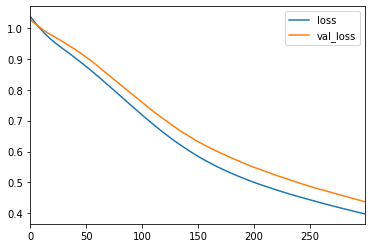

In [87]:
model_val[['loss','val_loss']].plot()

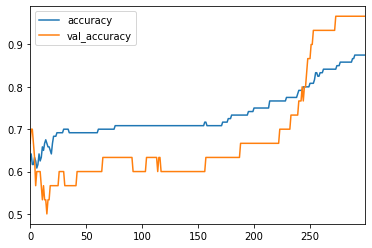

In [88]:
model_val[['accuracy','val_accuracy']].plot()

In [89]:
predictions = model.predict_classes(X_test_scaled)

In [92]:
predictions

array([0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [103]:
type(y_test)
#y_test.dtype

numpy.ndarray

In [107]:
y_yest_cat = np.argmax(y_test, axis=1)
y_yest_cat

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0])

In [90]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_yest_cat,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [112]:
single_prediction = model.predict_classes(X_test_scaled)[0]
print('single_prediction = ',single_prediction,end='\n')
print('real_label = ',y_yest_cat[0])

single_prediction =  0
real_label =  0
